## Introduction to Regression

 Predicting the numerical output values based on the relationship between variables.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating small data to view and fit

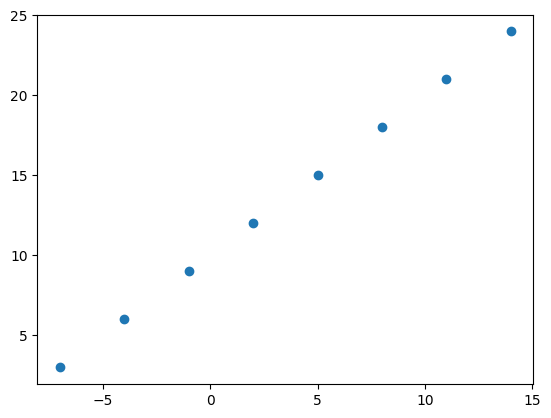

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# the relatioship that our model needs to predict is : y = X + 10

## Input and Output shapes

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [5]:
# here the no of features are one so input_shape = 1
# here the no of labels are one so output_shape = 1

## Convert our numpy arrays into tensors


In [6]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)

In [7]:
X[:10]

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [8]:
y[:10]

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function(a function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use it iterpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [9]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 7.7462 - mae: 7.7462
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.6137 - mae: 7.6137
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.4737 - mae: 7.4737


In [10]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make predictions using our model
y_pred = model.predict(tf.constant([[17.]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[29.179363]], dtype=float32)

In [12]:
# ground truth value is 27.0 and the prediction is not even near to that value.

## Improving our model

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add hidden layers, increase the number of hidden units(neurons) within each hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - here we might fit our model for more **epochs** (leave it training for longer) or on more data (give more examples to learn from)

### 1. Improving our model by trainng it for longer


In [13]:
# let's rebuild our model

# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit a model
model_1.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 13.3410 - mae: 13.3410
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 13.2085 - mae: 13.2085
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 13.0760 - mae: 13.0760
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 12.9435 - mae: 12.9435
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 12.8110 - mae: 12.8110
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 12.6785 - mae: 12.6785
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 12.5460 - mae: 12.5460
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 12.4135 - mae: 12.4135
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 12.2810 - mae: 12.2810
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 12.1485 - mae: 12.1485
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 12.0160 - mae: 12.0160
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 11.8835 - mae: 11.8835
Epoch 13/100
1/1 ━━━

In [14]:
# let's see our data
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# let's see if our model's prediction has improved
y_pred_1 = model_1.predict(tf.constant([[17.0]]))
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[29.60474]], dtype=float32)

In [16]:
# You can see clearly that our model has improved very much just by training it for longer. let's see if we can improve more

### 2. Improving our model by adding an extra hidden layer with hidden units


In [17]:
# create a model again with extra hidden layer
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit a model
model_2.fit(X, y , epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step - loss: 13.4719 - mae: 13.4719
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 13.0242 - mae: 13.0242
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.5752 - mae: 12.5752
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.1225 - mae: 12.1225
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.6639 - mae: 11.6639
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.1970 - mae: 11.1970
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.7193 - mae: 10.7193
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.2285 - mae: 10.2285
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.7220 - mae: 9.7220
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.1972 - mae: 9.1972
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.6514 - mae: 8.6514
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.0819 - mae: 8.0819
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [18]:
# X and y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# let's try to make prediction
model_2.predict(tf.constant([[17.]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[30.91927]], dtype=float32)

## Evaluating a model

When it comes to evaluation, we must try to visualize:
* **The data** - what data are we working with? what does it look like?
* **The model itself** - what does our model look like?
* **The Training of our model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of our model line up against the ground truth.

## Making a Bigger Dataset

In [20]:
X = tf.range(-100, 100, 4)
X[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64],
      dtype=int32)>

In [21]:
X.shape

TensorShape([50])

In [22]:
# Make labels for our dataset
y = X + 10
y[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54], dtype=int32)>

In [23]:
y.shape

TensorShape([50])

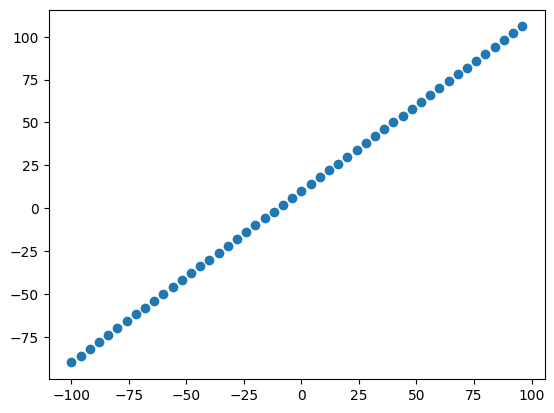

In [24]:
# Visualize our data
import matplotlib.pyplot as plt
plt.scatter(X, y)

## The 3 sets
Splitting the dataset into three parts:
* **Training set** - the model learns from the data, which is typically 70-80% of the total data you have available.
* **Validation set**- the model gets tuned on the data, which is typically 10-15% of the data available.
* **Test set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
len(y)

50

In [27]:
# split the data into train and test sets
X_train = X[:40]     # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]      # last 10 are testing samples

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

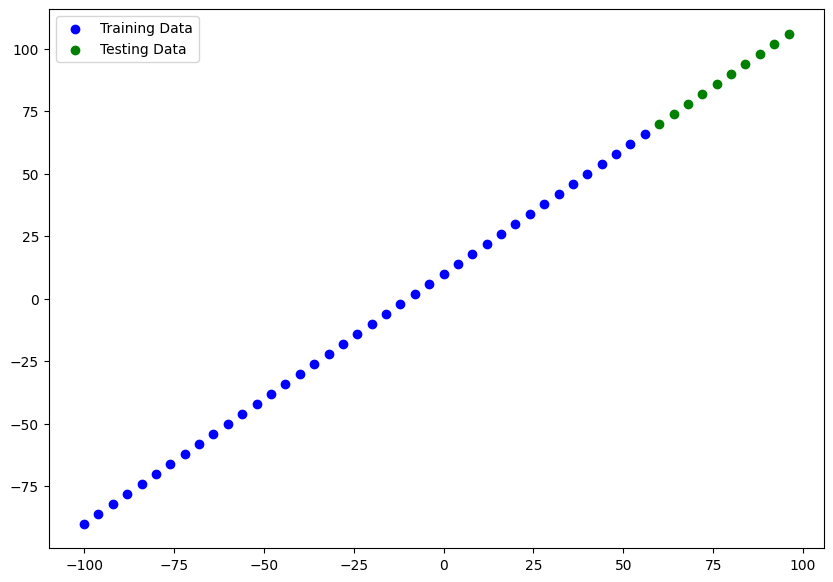

In [28]:
## Visualize the data
plt.figure(figsize=(10, 7))
# Plotting the training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data')
# Plotting the testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing Data')
# Show the legend
plt.legend()
plt.show()

In [29]:
# let's build a neural network on this data

# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer')
], name='model_3')

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 96.2992 - mae: 96.2992   
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 61.1310 - mae: 61.1310
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 26.5029 - mae: 26.5029
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.7144 - mae: 10.7144
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 10.2190 - mae: 10.2190
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9642 - mae: 11.9642
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8600 - mae: 8.8600
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3300 - mae: 10.3300
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.8713 - mae: 9.8713
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.5352 - mae: 11.5352
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.5123 - mae: 8.5123
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.9810 - mae: 9.9810  
Epoch 13/100
2/2 ━━━━━━━━━━━

## Visualize the model

In [30]:
# Get a summary of our model
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

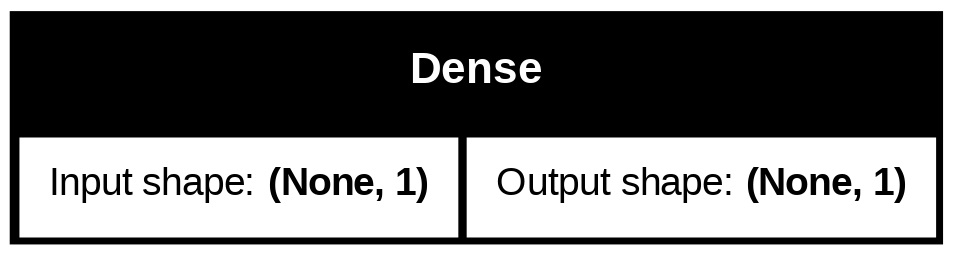

In [31]:
# visualize the model :
from tensorflow.keras.utils import plot_model
plot_model(model=model_3, show_shapes=True)

## Visualize the model's predictions

In [32]:
# Make some predictions
y_pred = model_3.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[43.208275],
       [45.99687 ],
       [48.78546 ],
       [51.574055],
       [54.362648],
       [57.15124 ],
       [59.939835],
       [62.728428],
       [65.51702 ],
       [68.30561 ]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [34]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
Plots training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(X_train, y_train, color='b', label='Training Data')
  # Plot testing data in green
  plt.scatter(X_test, y_test, color='g', label='Testing Data')
  # Plot model's predictions in red
  plt.scatter(X_test, predictions, c='r', label='Predictions')
  #Show the legend
  plt.legend()
  plt.show()

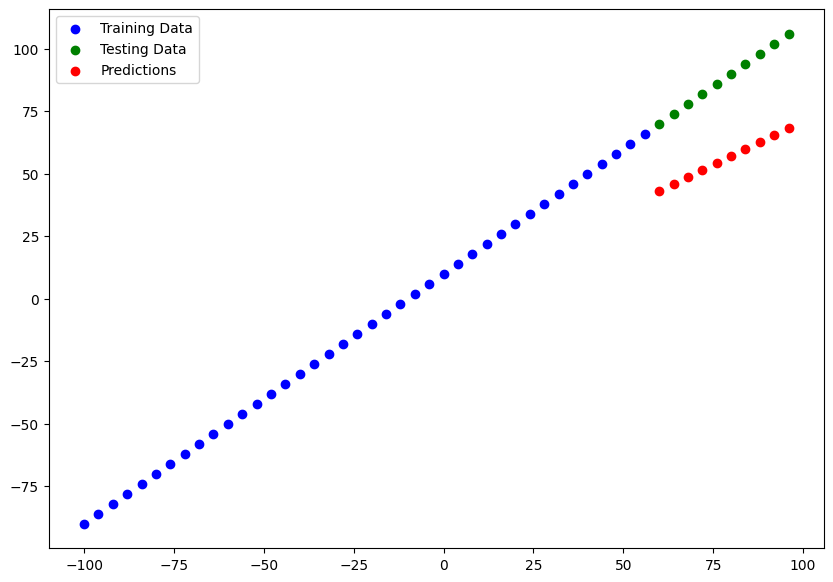

In [35]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [36]:
# Let's build one more model to make predictions little more accurate. This time, we will add one more layer
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_4')

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. fit the model
model_4.fit(X_train, y_train, epochs=100)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 41.8735 - mae: 41.8735
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 32.0005 - mae: 32.0005
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 23.2805 - mae: 23.2805
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 19.3170 - mae: 19.3170
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.3445 - mae: 17.3445
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 16.4022 - mae: 16.4022
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 11.4163 - mae: 11.4163
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 15.2215 - mae: 15.2215
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 16.0046 - mae: 16.0046
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 12.0194 - mae: 12.0194
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 15.0158 - mae: 15.0158
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 11.0669 - mae: 11.0669
Epoch 13/100
2/2 ━━

In [37]:
# summary of the model
model_4.summary()

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

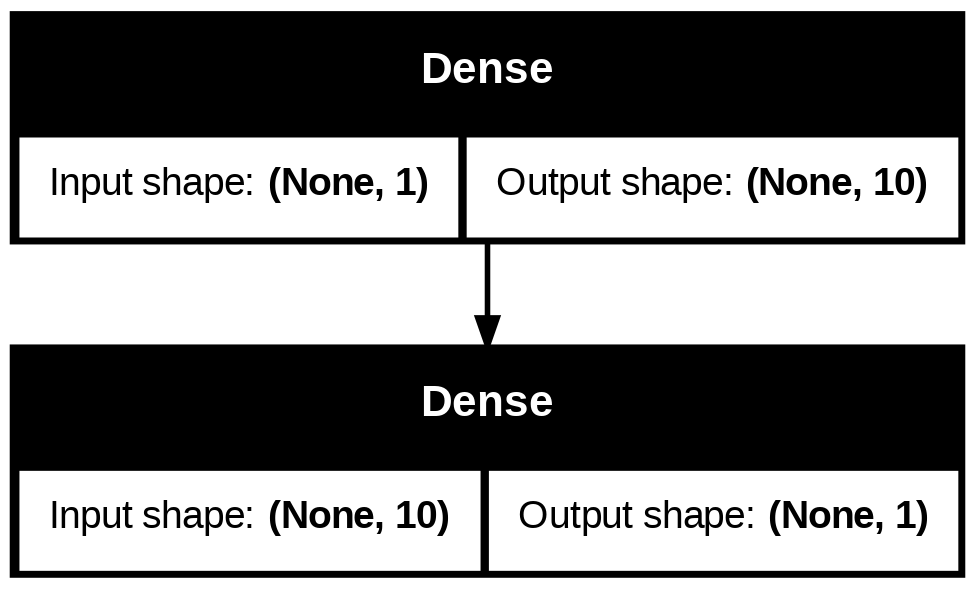

In [38]:
# Visualize our model
from tensorflow.keras.utils import plot_model
plot_model(model=model_4, show_shapes=True)

In [39]:
# Visualize the predictions of our model
y_pred = model_4.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[39.724056],
       [42.26397 ],
       [44.80388 ],
       [47.343796],
       [49.8837  ],
       [52.42362 ],
       [54.963528],
       [57.503437],
       [60.04335 ],
       [62.583263]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

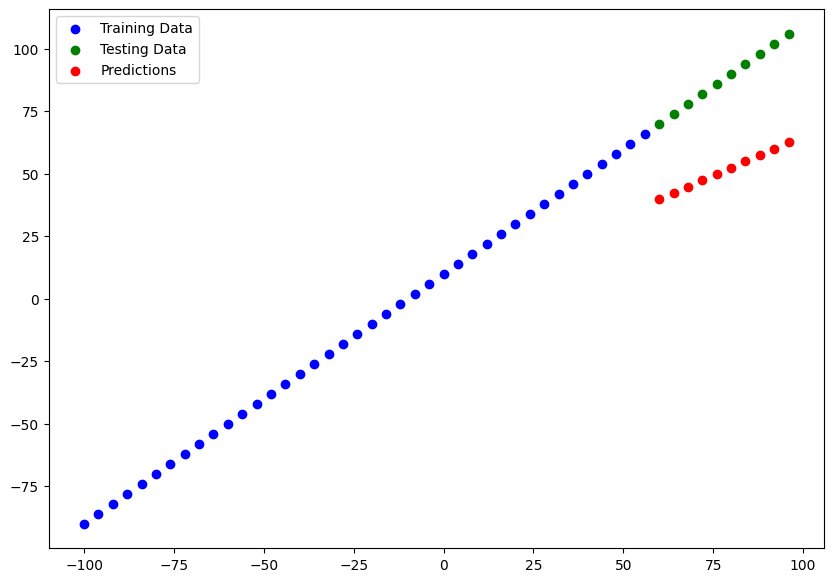

In [41]:
# plot the predictions
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [42]:
#observation: the model is not performing well after adding an extra layer

## Evaluating our model's predictions with regresion evaluation metrics:
* **MAE** - mean absolute error, on average, how wrong is each of my model's predictions
* **MSE** - mean squared error, square the average errors

In [43]:
# Evaluate the model on the test
model_4.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 36.8463 - mae: 36.8463


[36.84634017944336, 36.84634017944336]

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test,
                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=36.84634017944336>

In [45]:
# Calculate the mean squared error
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1375.2406005859375>

## Running Experiments to improve our model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. **Make your model larger** - using more complex model,  this might come in a form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a change to find patterns in the data

Let's do 3 modelling experiments:
  1. **model_1** - same as the original model, 1 layer, trained for 100 epochs
  2. **model_2** - 2 layers, trained for 100 epochs
  3. **model_3** - 2 layers, trained for 200 epochs

### **Build model_1**

In [46]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 51.6471 - mae: 51.6471 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.1289 - mae: 18.1289
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6249 - mae: 11.6249
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8333 - mae: 7.8333
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.7346 - mae: 10.7346
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6498 - mae: 7.6498
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9005 - mae: 11.9005
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.0098 - mae: 8.0098
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7099 - mae: 9.7099
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.9919 - mae: 7.9919
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6983 - mae: 9.6983
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.9741 - mae: 7.9741
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


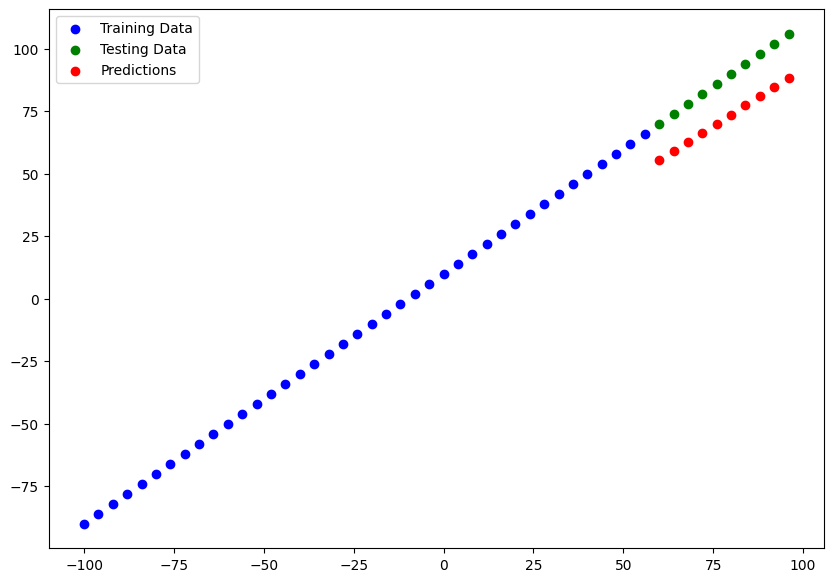

In [47]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = tf.metrics.mae(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.108715057373047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=260.71295166015625>)

### **Build model_2**
* 2 dense layers, trained for 100 epochs

In [49]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 47.0912 - mae: 47.0912 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 30.3648 - mae: 30.3648
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.9545 - mae: 26.9545
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.2032 - mae: 16.2032
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 19.1888 - mae: 19.1888
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.0664 - mae: 13.0664
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.9480 - mae: 14.9480
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.5736 - mae: 15.5736
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3053 - mae: 11.3053
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.1592 - mae: 15.1592
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.1432 - mae: 11.1432
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.9961 - mae: 14.9961 
Epoch 13/100
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


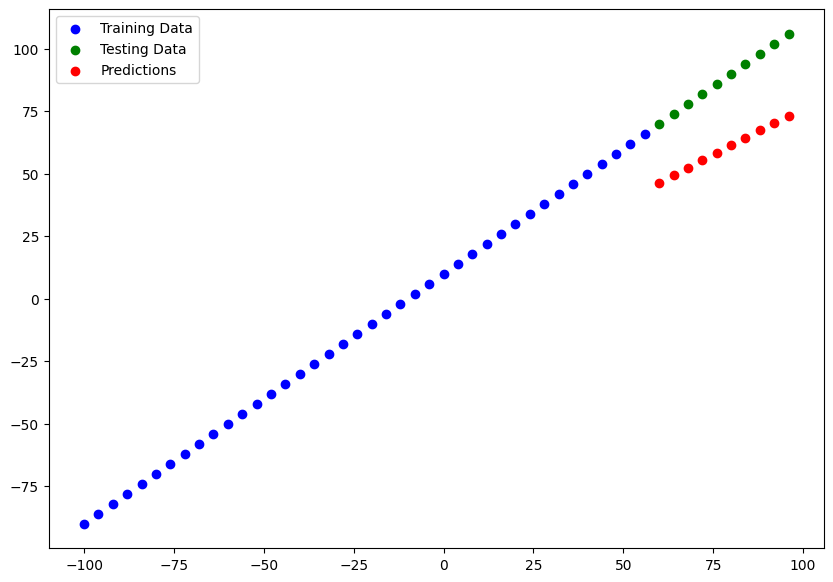

In [50]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [51]:
# Calculate model_2 evaluation metrics
mae_2 = tf.metrics.mae(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.131454467773438>,
 <tf.Tensor: shape=(), dtype=float32, numpy=799.9124755859375>)

### **Build model_3**
* 2 layers, trained for 200 epochs

In [52]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 12.3863 - mae: 12.3863
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 22.5801 - mae: 22.5801
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.9098 - mae: 7.9098 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.5786 - mae: 21.5786
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 18.4986 - mae: 18.4986 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 17.0275 - mae: 17.0275
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.3905 - mae: 16.3905
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.8042 - mae: 11.8042
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.6934 - mae: 14.6934
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 15.5469 - mae: 15.5469
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.6522 - mae: 11.6522
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.6268 - mae: 14.6268
Epoch 13/200
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


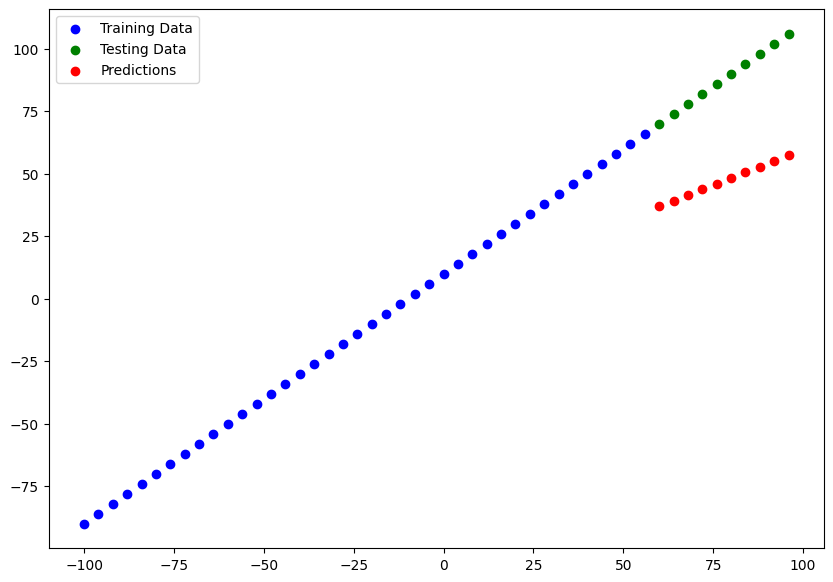

In [53]:
# Make and plot preditions
y_preds_3 = model_3.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [54]:
# Calculate model_3 evaluation metrics
mae_3 = tf.metrics.mae(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=40.81491470336914>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1690.565673828125>)

### Comparing the results of our experiments

In [55]:
# let's compare our model's results using a dataframe
import pandas as pd
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
results

,model,mae,mse
0,model_1,16.108715,260.712952
1,model_2,28.131454,799.912476
2,model_3,40.814915,1690.565674


In [56]:
# Looks like model_1 is performed the best compare to others

In [57]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Saving our models
Saving our models allows us to use in a web application or mobile app.



In [58]:
model_1.save("best_linear_model.keras")

## Loading a Saved Model

In [59]:
# Loading a saved model
model = tf.keras.models.load_model('best_linear_model.keras')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [60]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [61]:
# Let's compare model_1 predictions with saved model to check whether models preservers their weights and biases
model_1_preds = model_1.predict(X_test)
saved_model_preds = model.predict(X_test)
model_1_preds == saved_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab
1. You can go to the 'files' tab and right click on the file you're after and click 'download'.
2. Use code
3. Save it to Google Drive by connecting Google Drive and copying it there

In [62]:
# Download a file from google colab:
from google.colab import files
files.download('best_linear_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Save a file from google colab to google drive (requires mounting google drive)
!cp /content/best_linear_model.keras /content/drive/MyDrive

In [64]:
!ls /content/drive/MyDrive

'50 rupees.jpg'		  'Personal Data'
 best_linear_model.keras  'Untitled document.gdoc'
 Classroom		  'Untitled drawing (1).gdraw'
'Colab Notebooks'	  'Untitled drawing (2).gdraw'
'Copy of FORM 15G.docx'   'Untitled drawing (3).gdraw'
 Docs			  'Untitled drawing.gdraw'


## A Larger Example

In [65]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Read the dataset
insurance = pd.read_csv('/content/Data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
# let's try one hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [73]:
# Create X and Y (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']


In [74]:
# view X
X[:10]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0
7,37,27.740,3,1,0,1,0,0,1,0,0
8,37,29.830,2,0,1,1,0,1,0,0,0
9,60,25.840,0,1,0,1,0,0,1,0,0


In [75]:
# view y
y[:10]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [77]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [78]:
len(X)

1338

In [79]:
len(y)

1338

In [86]:
# Input shape
X.shape

(1338, 11)

In [87]:
# Output shape
y.shape

(1338,)

### Build insurance_model_1


In [88]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
# 3. fit the model
insurance_model.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10164.6338 - mae: 10164.6338
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7348.7100 - mae: 7348.7100
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7552.2935 - mae: 7552.2935
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7301.7534 - mae: 7301.7534
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7860.1567 - mae: 7860.1567
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7665.5488 - mae: 7665.5488
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7462.2734 - mae: 7462.2734
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7679.4595 - mae: 7679.4595
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7823.1104 - mae: 7823.1104
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7361.3809 - mae: 7361.3809
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.9531 - mae: 7380.9531
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

### Right now it looks like our model isn't performing too well. let's try and improve it.
we are going to perform 2 experiments
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train it for longer (200 epochs)

In [89]:
# let's seee the data
X[:5], y[:5]

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

### **Build insurance_model_2**
* extra hidden layer with hidden units

In [94]:
# let's build another model with extra hidden layer and hidden units
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 13284.6465 - mae: 13284.6465
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13148.8545 - mae: 13148.8545
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12868.0908 - mae: 12868.0908
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12295.3535 - mae: 12295.3535
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11293.1855 - mae: 11293.1855
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9912.5771 - mae: 9912.5771  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8497.9414 - mae: 8497.9414
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7608.6587 - mae: 7608.6587
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7424.8672 - mae: 7424.8672
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7392.3174 - mae: 7392.3174
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7370.5479 - mae: 7370.5479
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [95]:
# Evaluating the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4848.2705 - mae: 4848.2705 


[4711.80029296875, 4711.80029296875]

In [96]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8200.1670 - mae: 8200.1670


[8176.36865234375, 8176.36865234375]

### Build insurance_model_3
* same model but training it for longer (200 epochs)

In [100]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13271.1885 - mae: 13271.1885
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13106.0078 - mae: 13106.0078
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12770.6914 - mae: 12770.6914
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12109.5098 - mae: 12109.5098
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10984.3047 - mae: 10984.3047
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9519.4082 - mae: 9519.4082
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8151.7222 - mae: 8151.7222
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7472.8457 - mae: 7472.8457
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7373.4590 - mae: 7373.4590
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7348.7759 - mae: 7348.7759
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7326.9360 - mae: 7326.9360
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [101]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3460.5164 - mae: 3460.5164


[3394.48828125, 3394.48828125]

### Visualize the training curve or loss curve

Text(0, 0.5, 'loss')

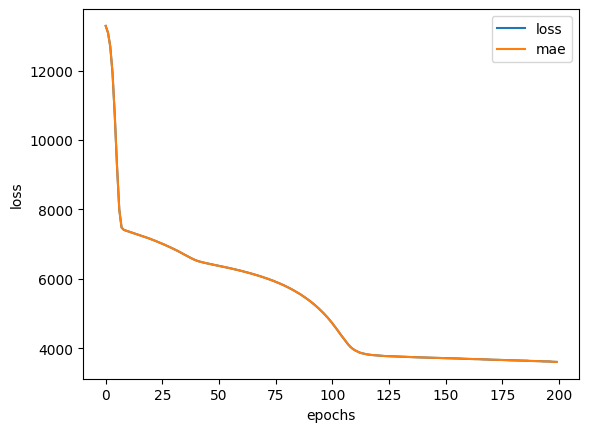

In [103]:
# plot loss curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

## Preprocessing data (normalization and standardization)


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [106]:
# Read the insurance dataset
insurance = pd.read_csv('/content/Data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
# to prepare our data, we can use some classes from sklearn.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),  # turn all the values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker','region'])
)

# create independent and dependent features
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer into training data
ct.fit(X_train)

# Transform training and test data with normalization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [108]:
# what does our data look like?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [109]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

### **Build insurance_model_4 (preprocessed data)**

In [112]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. fit the model
history_1 = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13297.3955 - mae: 13297.3955
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13288.8213 - mae: 13288.8213
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13268.5791 - mae: 13268.5791
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13225.6328 - mae: 13225.6328
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13147.8936 - mae: 13147.8936
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13024.0107 - mae: 13024.0107
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12843.7441 - mae: 12843.7441
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12597.2451 - mae: 12597.2451
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12274.9238 - mae: 12274.9238
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11872.0264 - mae: 11872.0264
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11399.1270 - mae: 11399.1270
Epoch 12/100
34/34 ━━━━━━━━━━━

In [113]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3514.5112 - mae: 3514.5112  


[3429.248046875, 3429.248046875]

In [117]:
# Insurance model 2 evaluation:

# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4848.2705 - mae: 4848.2705
# [4711.80029296875, 4711.80029296875]

Our model (`insurance_model_4`) fit on normalized data achieved a ~30% better score compared to the same model (`insurnace_model_2`) fit on non-normalized data!

In [118]:
insurance_model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [119]:
insurance_model_4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)